## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading .csv File - Restaurants Tips Data

In [3]:
df = pd.read_csv('data/tips.csv')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Basic Data Analysis

In [4]:
df.shape

(244, 7)

In [5]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df.describe(include=['object'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Univariate Non Visual Analysis

In [9]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [10]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std']))
        print()discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [11]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [12]:
discrete_univariate_analysis(discrete_df)

********** sex **********
count                 244
nunique                 2
unique     [Female, Male]
Name: sex, dtype: object
Value Counts: 
 sex
Male      157
Female     87
Name: count, dtype: int64

********** smoker **********
count            244
nunique            2
unique     [No, Yes]
Name: smoker, dtype: object
Value Counts: 
 smoker
No     151
Yes     93
Name: count, dtype: int64

********** day **********
count                        244
nunique                        4
unique     [Sun, Sat, Thur, Fri]
Name: day, dtype: object
Value Counts: 
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

********** time **********
count                  244
nunique                  2
unique     [Dinner, Lunch]
Name: time, dtype: object
Value Counts: 
 time
Dinner    176
Lunch      68
Name: count, dtype: int64



In [13]:
numerical_univariate_analysis(numerical_df)

********** total_bill **********
count     244.000000
min         3.070000
max        50.810000
mean       19.785943
median     17.795000
std         8.902412
Name: total_bill, dtype: float64

********** tip **********
count     244.000000
min         1.000000
max        10.000000
mean        2.998279
median      2.900000
std         1.383638
Name: tip, dtype: float64

********** size **********
count     244.000000
min         1.000000
max         6.000000
mean        2.569672
median      2.000000
std         0.951100
Name: size, dtype: float64



### Univariate Visual Analysis

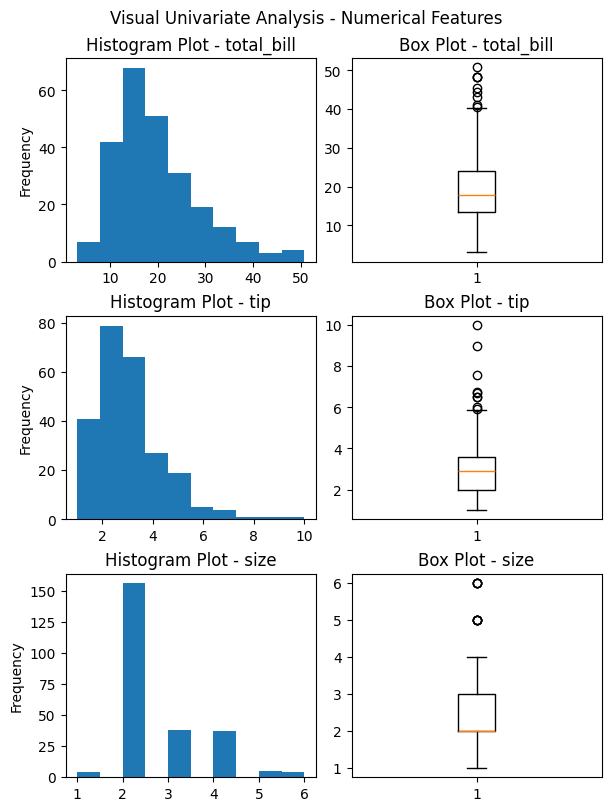

In [14]:
# Histograms and Box Plots

fig, axs = plt.subplots(3, 2, figsize=(6, 8), layout="constrained")
fig.suptitle("Visual Univariate Analysis - Numerical Features")

cols = numerical_df.columns

for idx, ax in enumerate(axs):
    col_name = cols[idx]
    ax[0].hist(df[col_name])
    ax[0].set_title("Histogram Plot - " + col_name)
    ax[0].set_ylabel("Frequency")
    
    ax[1].boxplot(df[col_name])
    ax[1].set_title("Box Plot - " + col_name)    

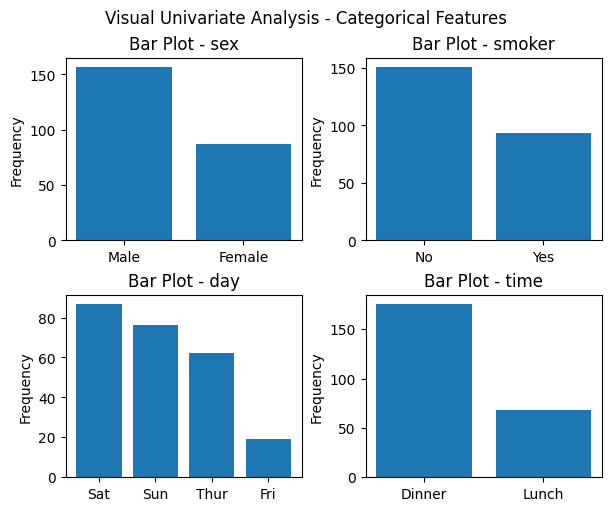

In [15]:
# Bar Plots

fig, axs = plt.subplots(2, 2, figsize=(6, 5), layout="constrained")
fig.suptitle("Visual Univariate Analysis - Categorical Features")

cols = discrete_df.columns

for idx, ax in enumerate(axs.ravel()):
    col_name = cols[idx]
    data = df[col_name].value_counts()
    ax.bar(data.index, data.values)
    ax.set_title("Bar Plot - " + col_name)
    ax.set_ylabel("Frequency")

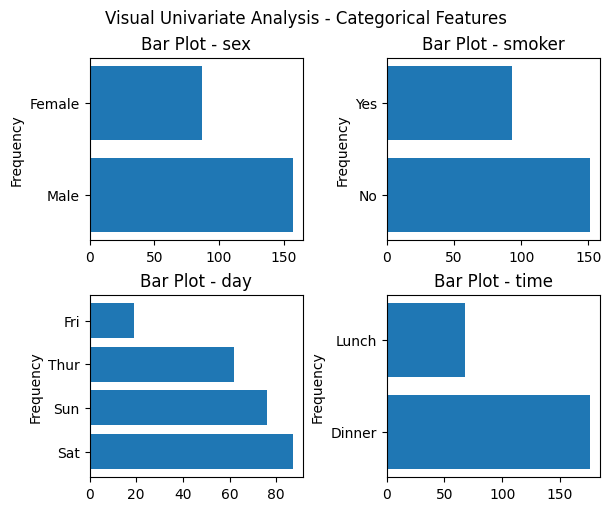

In [16]:
# Horizontal Bar Plots

fig, axs = plt.subplots(2, 2, figsize=(6, 5), layout="constrained")
fig.suptitle("Visual Univariate Analysis - Categorical Features")

cols = discrete_df.columns

for idx, ax in enumerate(axs.ravel()):
    col_name = cols[idx]
    data = df[col_name].value_counts()
    ax.barh(data.index, data.values)
    ax.set_title("Bar Plot - " + col_name)
    ax.set_ylabel("Frequency")

### Bivariate Analysis - Non Visual and Visual Analysis

In [17]:
numerical_df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


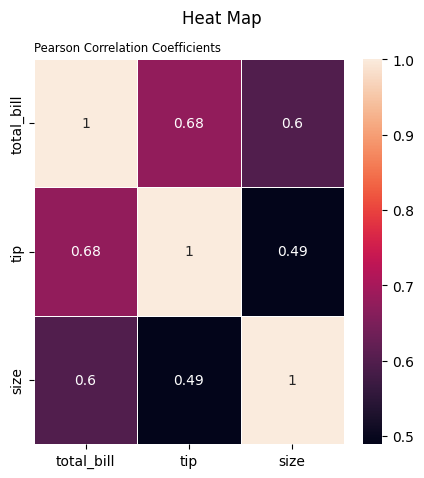

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.suptitle("Heat Map")

ax.set_title("Pearson Correlation Coefficients", loc="left", fontsize="small")
ax = sns.heatmap(numerical_df.corr(), annot=True, linewidths=0.5)

plt.show()

In [19]:
tab = pd.crosstab(discrete_df['day'], discrete_df['time'], normalize='index')

tab

time,Dinner,Lunch
day,,
Fri,0.631579,0.368421
Sat,1.000000,0.000000
Sun,1.000000,0.000000
Thur,0.016129,0.983871


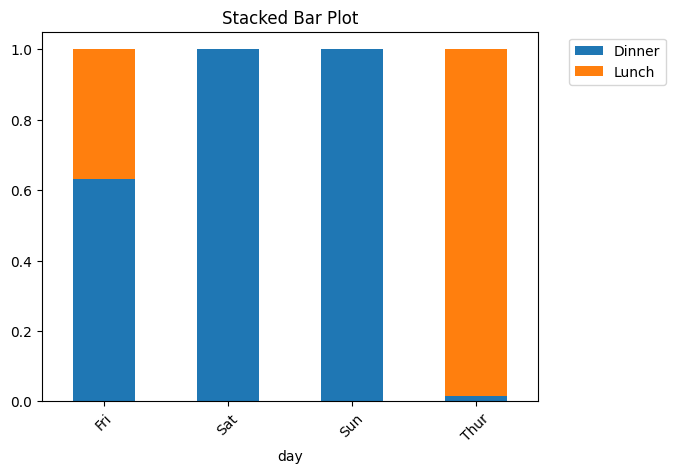

In [20]:
tab.plot(kind='bar', stacked=True)

plt.title("Stacked Bar Plot")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()